# Power Transformations

`Power transformations` are used to reduce skewness, stabilize variance, and make data more Gaussian-like.
This often improves the performance of machine learning models that assume linearity or normality.

They are especially useful when:
- Data is right-skewed or left-skewed  
- Features show non-constant variance (heteroscedasticity)  
- You want to improve the effectiveness of linear models, GLMs, SVMs, and distance-based algorithms  

---

## Why Power Transformations Help

Many machine learning models perform better when:
- Feature distributions are approximately normal  
- Variance is stable across values  
- Extreme values are compressed  

Power transformations address these issues at the feature level.

---

## 1. Box-Cox Transformation

The **Box-Cox transformation** is a family of power transformations defined only for **strictly positive values**.

### Key Properties
- Requires all values to be greater than zero  
- Automatically estimates the best transformation parameter $(\lambda)$  
- Effective at reducing right skewness  
- Often makes distributions closer to normal  

### Common Use Cases
- Income  
- Expenditure  
- Population counts  
- Biological and medical measurements  

### Limitation
- Cannot be applied if the feature contains zero or negative values  

---

## 2. Yeo-Johnson Transformation

The **Yeo-Johnson transformation** is an extension of Box-Cox that supports **zero and negative values**.

### Key Properties
- Works with positive, zero, and negative values  
- Automatically estimates the best transformation parameter $(\lambda)$  
- More flexible than Box-Cox  
- Suitable for real-world datasets with mixed-value distributions  

### Common Use Cases
- Features containing zeros  
- Financial data with gains and losses  
- Centered or normalized features  

---

## Box-Cox vs Yeo-Johnson

| Aspect | Box-Cox | Yeo-Johnson |
|------|--------|-------------|
| Supports negative values | No | Yes |
| Supports zero values | No | Yes |
| Reduces skewness | Yes | Yes |
| Automatically estimates $(\lambda)$ | Yes | Yes |
| Real-world flexibility | Limited | High |



In [1]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df=pd.read_csv('concrete_data.csv')
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
455,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,56,51.26
895,260.0,101.0,78.0,171.0,10.0,936.0,763.0,28,49.77
267,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,56,45.08
299,290.4,0.0,96.2,168.1,9.4,961.2,865.0,3,22.50
259,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3,13.33


In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [11]:
X=df.drop(columns=['Strength'])
y=df['Strength']
X,y

(      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
 0      540.0                 0.0      0.0  162.0               2.5   
 1      540.0                 0.0      0.0  162.0               2.5   
 2      332.5               142.5      0.0  228.0               0.0   
 3      332.5               142.5      0.0  228.0               0.0   
 4      198.6               132.4      0.0  192.0               0.0   
 ...      ...                 ...      ...    ...               ...   
 1025   276.4               116.0     90.3  179.6               8.9   
 1026   322.2                 0.0    115.6  196.0              10.4   
 1027   148.5               139.4    108.6  192.7               6.1   
 1028   159.1               186.7      0.0  175.6              11.3   
 1029   260.9               100.5     78.3  200.6               8.6   
 
       Coarse Aggregate  Fine Aggregate  Age  
 0               1040.0           676.0   28  
 1               1055.0           676.0   28  
 2   

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(824, 8)

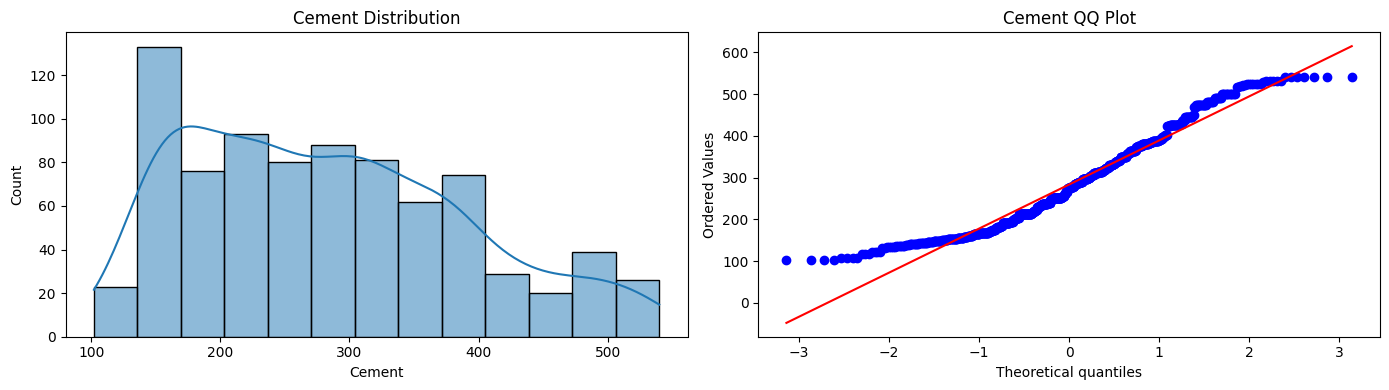

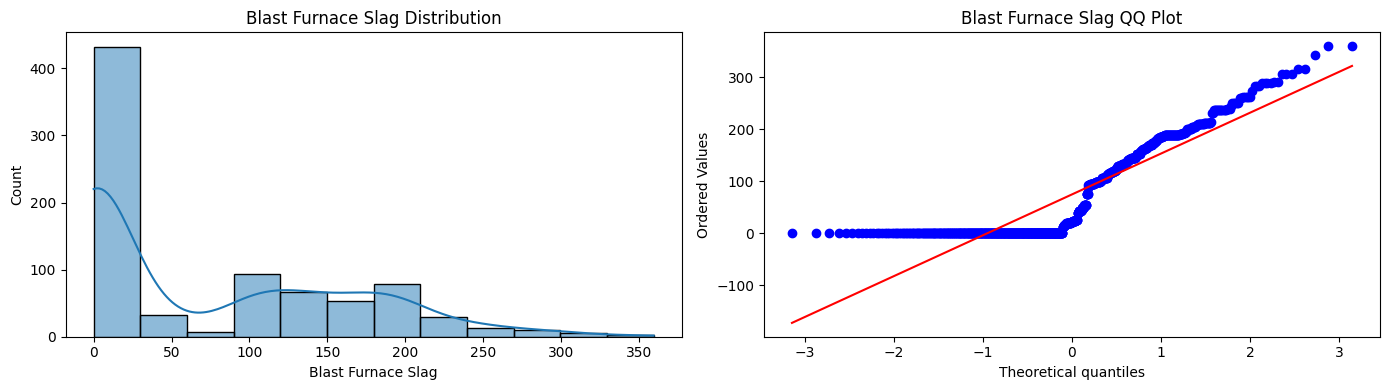

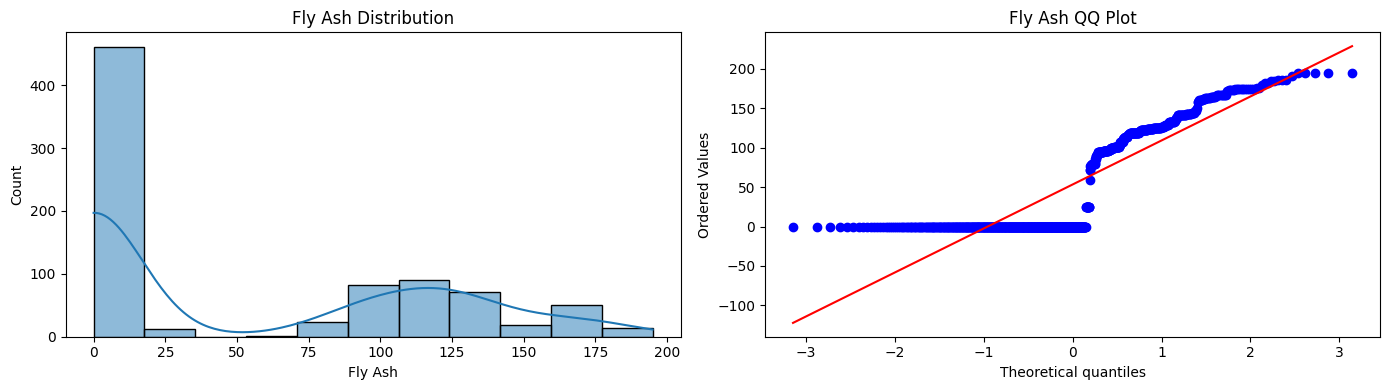

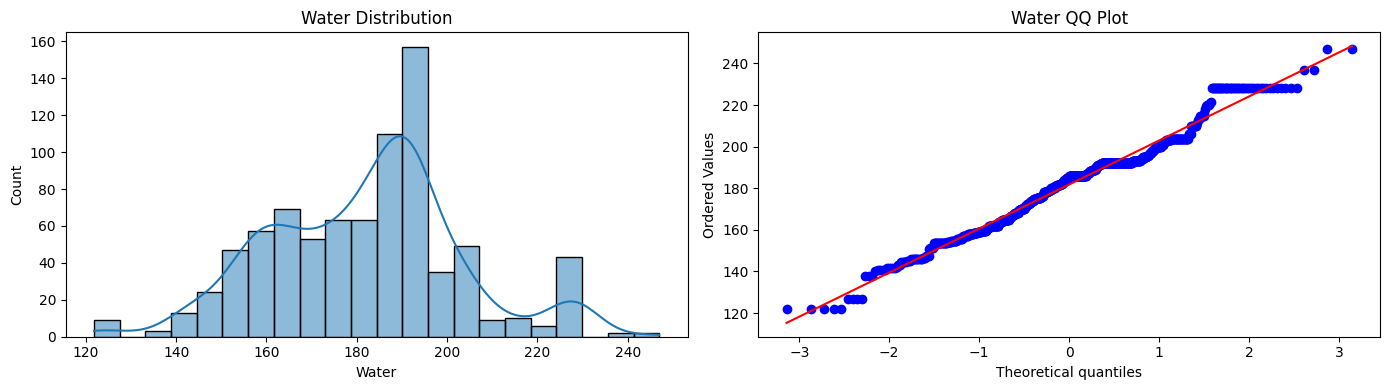

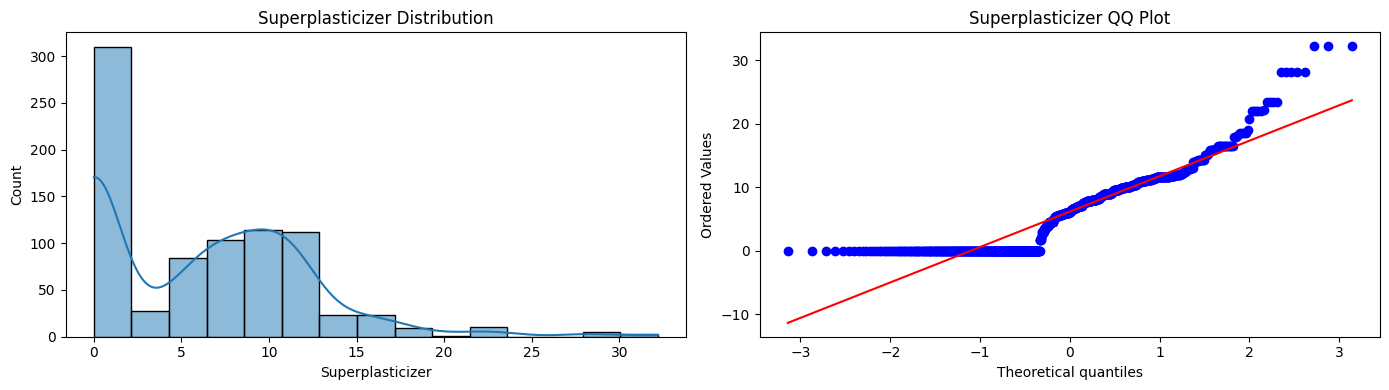

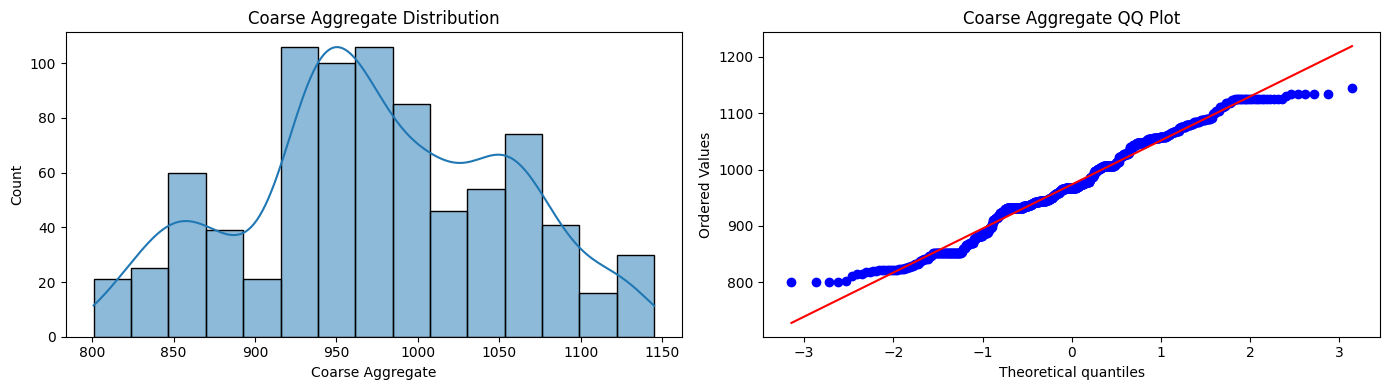

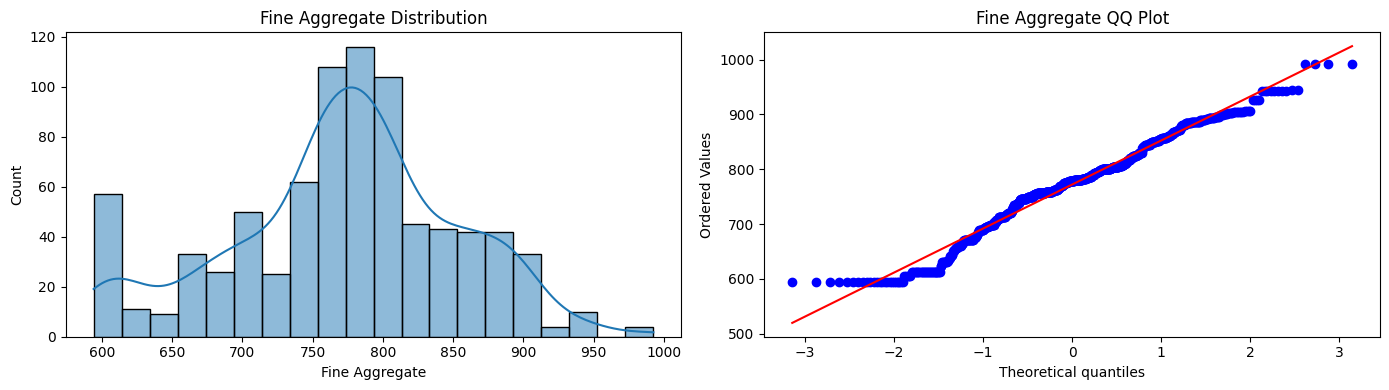

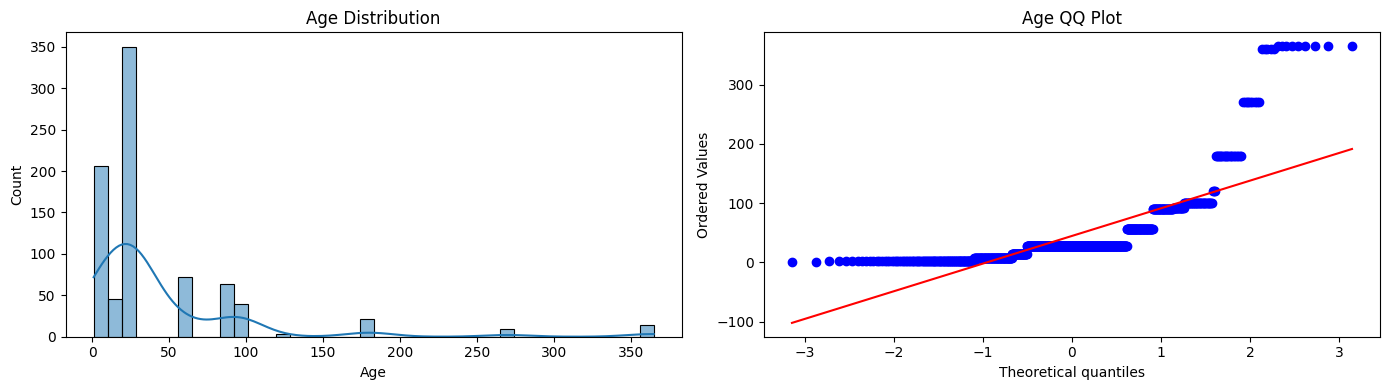

In [13]:
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # PDF / Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} Distribution")

    # QQ Plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"{col} QQ Plot")

    plt.tight_layout()
    plt.show()


## Box-Cox Transformation

In [16]:
pt= PowerTransformer(method='box-cox')

X_train_transformed= pt.fit_transform(X_train + 0.000001)
X_test_transformed= pt.transform(X_test + 0.000001)



pd.DataFrame({
    'cols': X_train.columns,
    'box_cox_lambdas': pt.lambdas_
})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [17]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred=lr.predict(X_test_transformed)

r2_score(y_test,y_pred)

0.8047825008078886

In [20]:
pt=PowerTransformer(method='box-cox')
X_transformed2= pt.fit_transform(X+0.000001)

np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))


np.float64(0.6662950326831086)

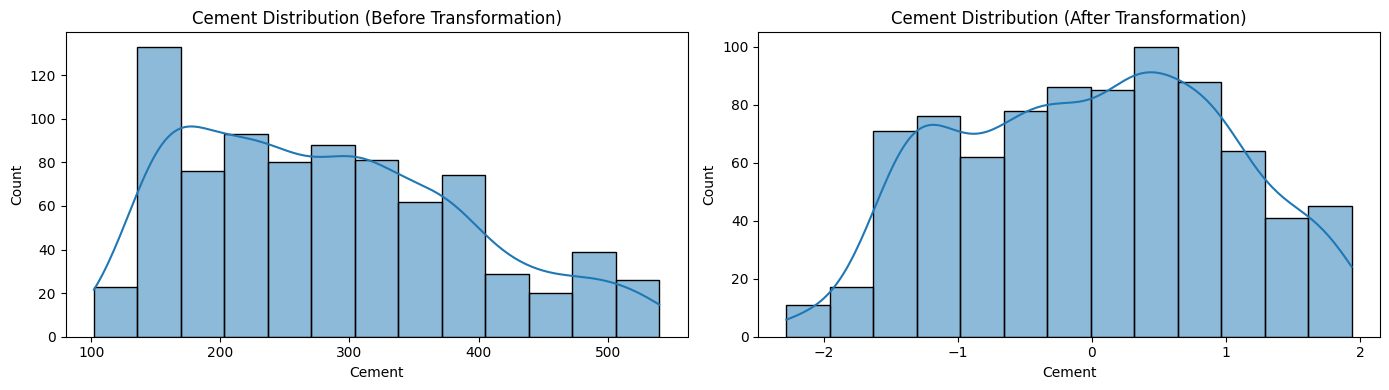

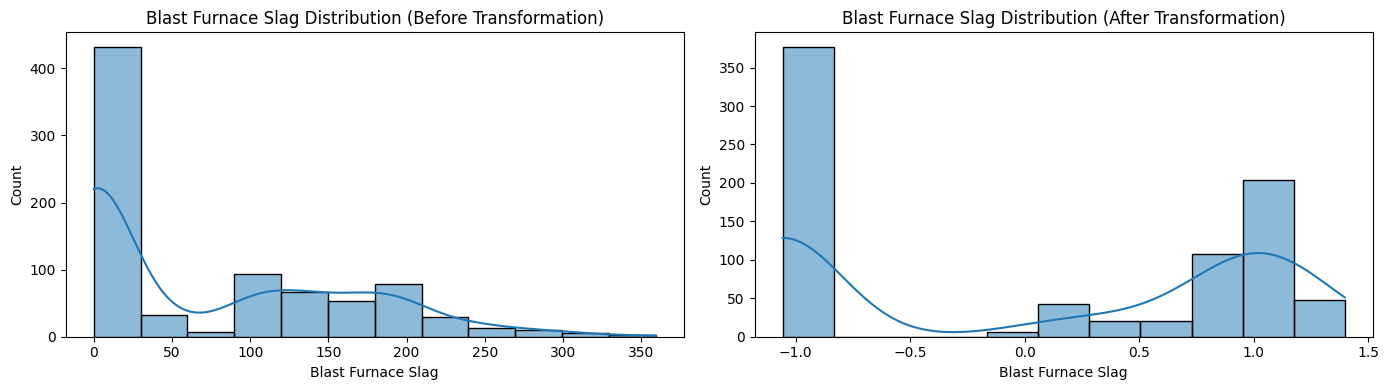

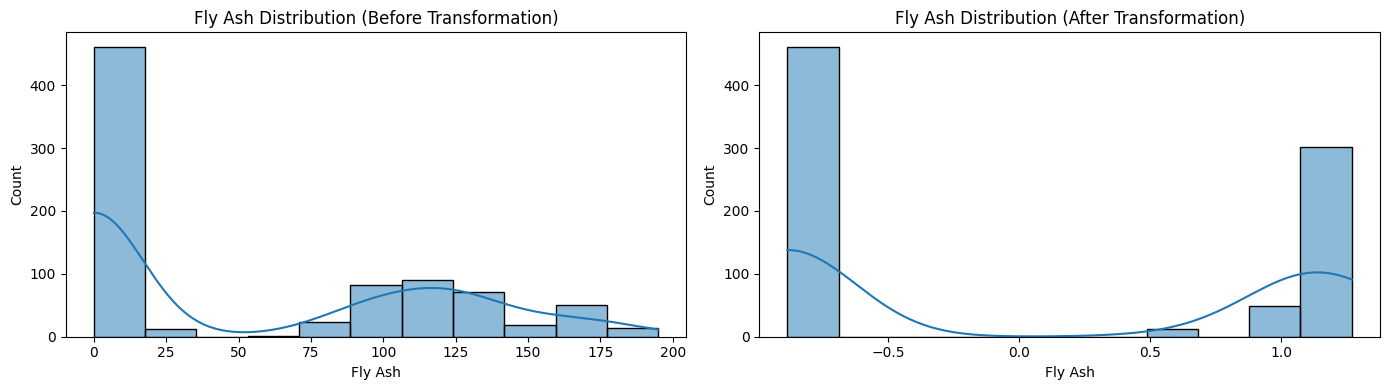

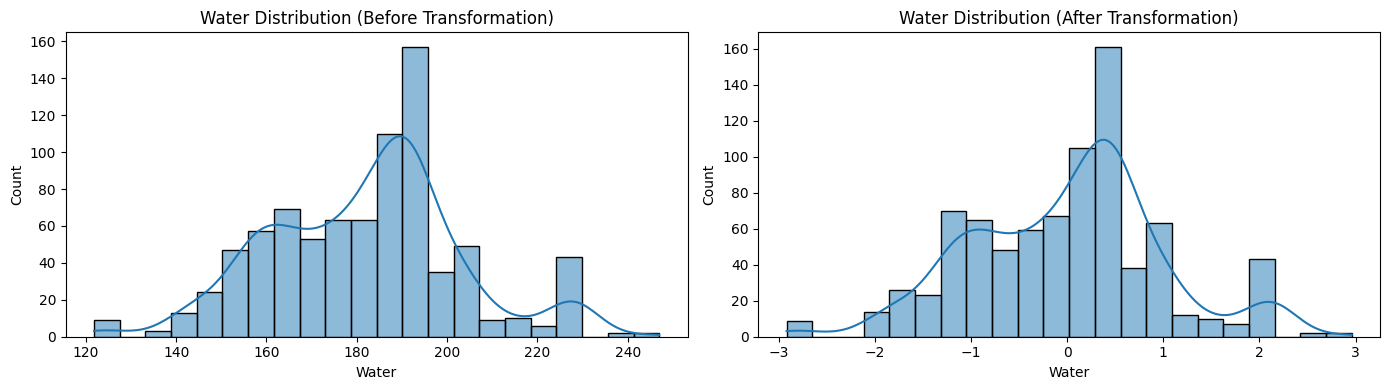

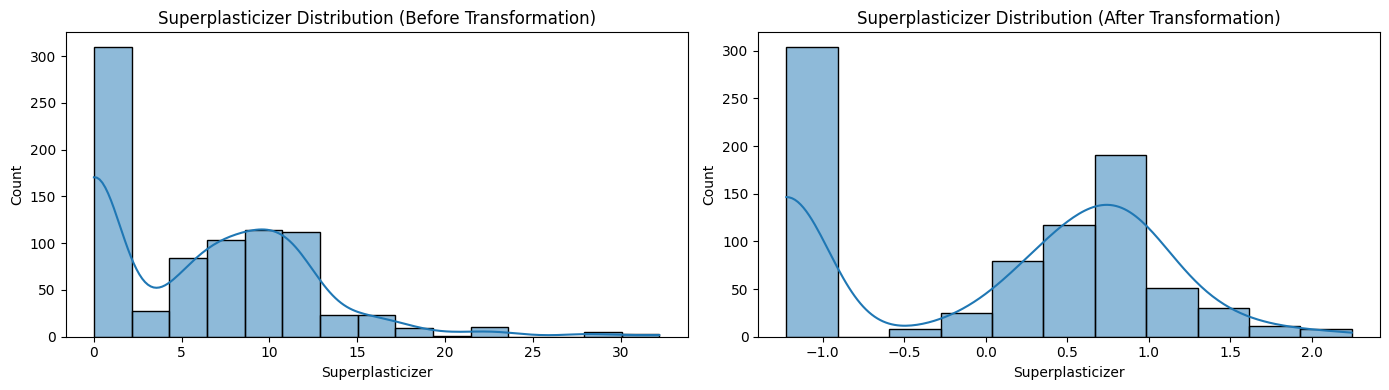

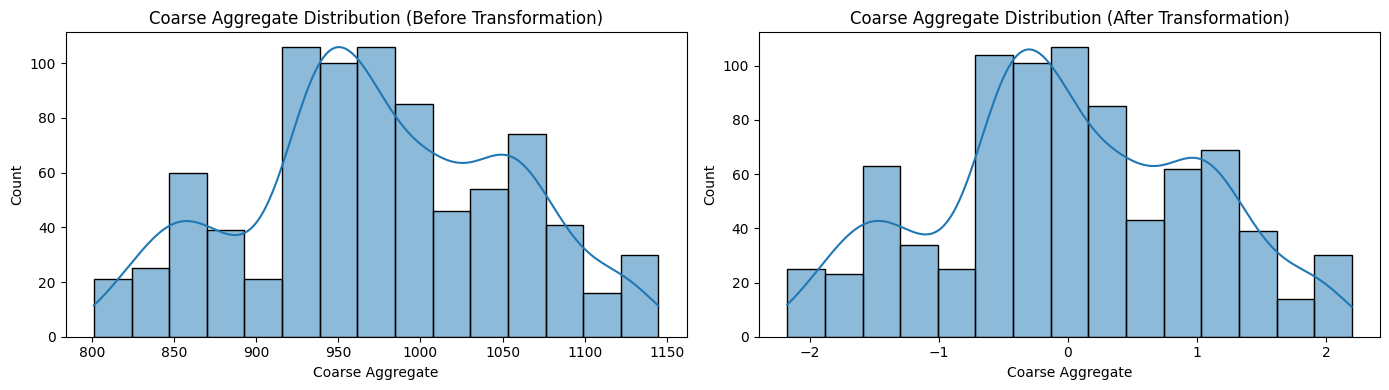

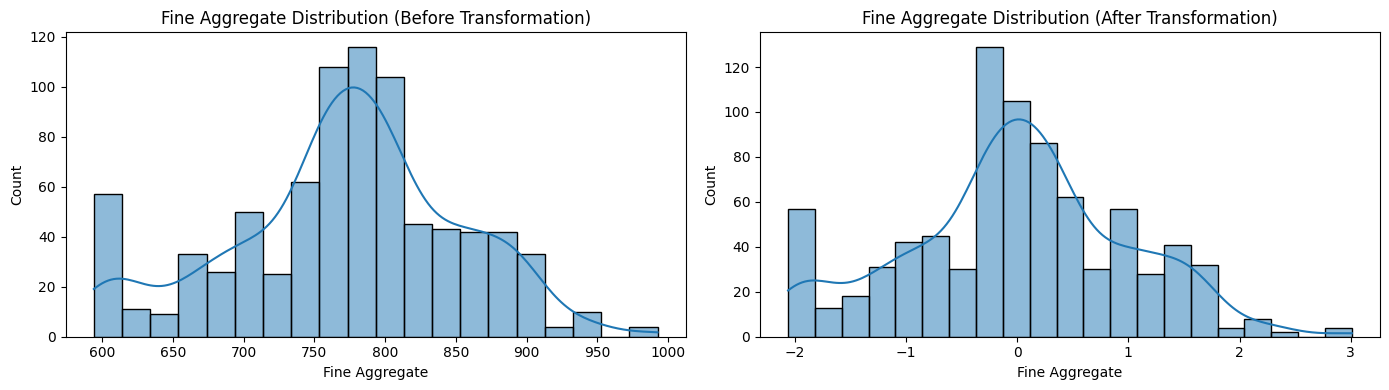

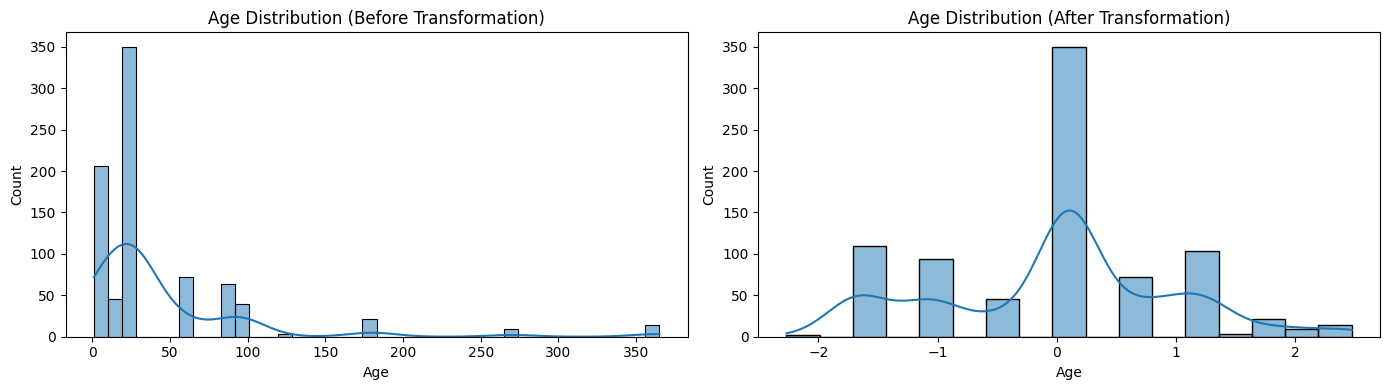

In [29]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Before transformation
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} Distribution (Before Transformation)")

    # After transformation
    plt.subplot(1, 2, 2)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f"{col} Distribution (After Transformation)")

    plt.tight_layout()
    plt.show()


## Yeo-Johnson Transformation

In [25]:
pt= PowerTransformer()

X_train_transformed= pt.fit_transform(X_train)
X_test_transformed= pt.transform(X_test)



pd.DataFrame({
    'cols': X_train.columns,
    'yeo_johnson_lambdas': pt.lambdas_
})

,cols,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [26]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred=lr.predict(X_test_transformed)

r2_score(y_test,y_pred)

0.8161906511066099

In [27]:
pt=PowerTransformer()
X_transformed2= pt.fit_transform(X)

np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))


np.float64(0.6834625126992433)